<a href="https://colab.research.google.com/github/quinn-dougherty/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [120]:
import pandas as pd

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')

df.isna().sum() # no missing features. 

headers = ['age', 'year_of_op', 'nodes_detected', 'survived']

df.columns = headers

df.describe()


,age,year_of_op,nodes_detected,survived
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [121]:
# The survival variable is encoded as 1 for surviving >5 years and 2 for not 
# - change this to be 0 for not surviving and 1 for surviving >5 

df[headers[3]].replace(to_replace=2, value=0, inplace=True)

df[headers[3]].head()

0    1
1    1
2    1
3    1
4    1
Name: survived, dtype: int64

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

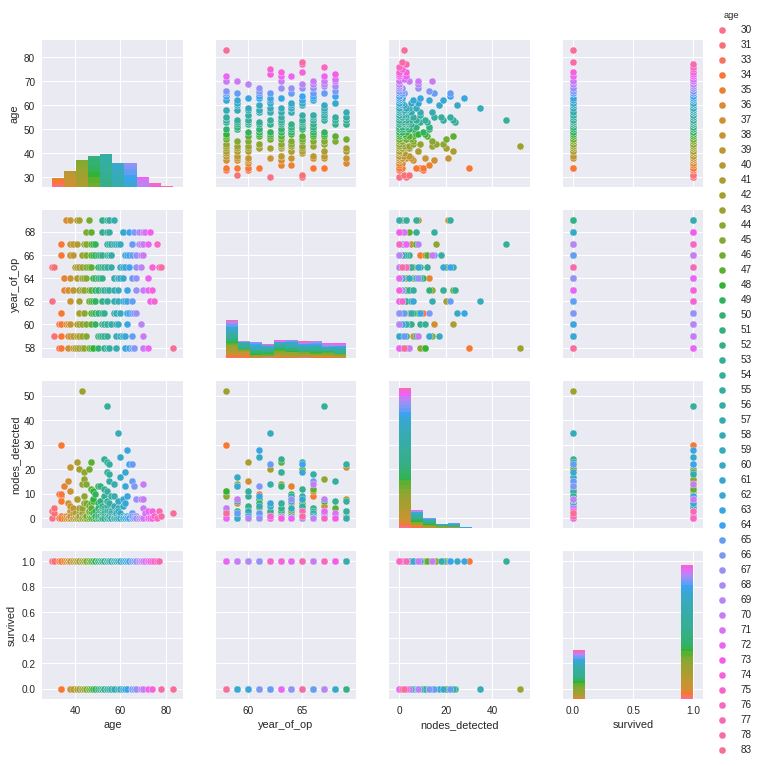

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns #; sns.set(style="ticks", color_codes=True)

# sns.pairplot(df, hue=headers[0], kind="reg");
sns.pairplot(df, hue=headers[0]);

# plt.scatter(df[headers[0]], df[headers[1]]); 

## we can see from the pairplot call a few insights: 
##### 1. the age of our sample is approximately normally distributed. 
##### 2. the # of nodes detected is overwelmingly 0
##### 3. since all our numeric data are ints not floats, categories after binning might make more sense. 

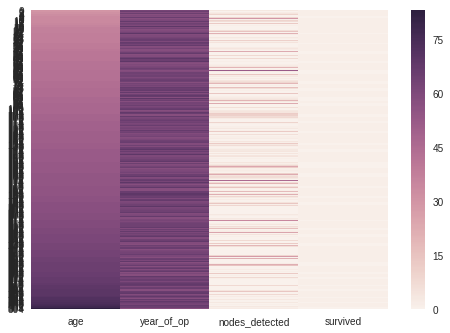

In [123]:
sns.heatmap(df); # just curious what this looks like 

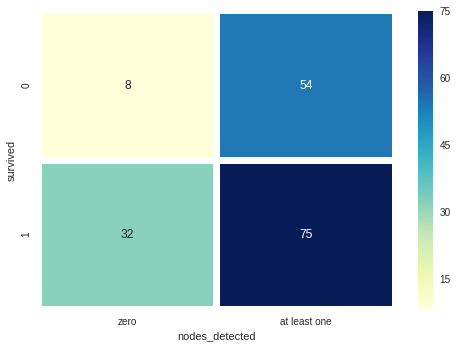

In [124]:
## let's bin nodes detected into "none" and ">1" 

node_bins = pd.cut(df[headers[2]], [0,1,1000], labels=["zero", "at least one"])
# cut and qcut aren't doing what i want. 

nodes_cross_surv_freqs = pd.crosstab(df[headers[3]], node_bins)

sns.heatmap(nodes_cross_surv_freqs, annot=True,linewidths=6,cmap="YlGnBu");

# sns.pairplot(df, hue=headers[0]);

# print(node_bins, df[headers[2]])


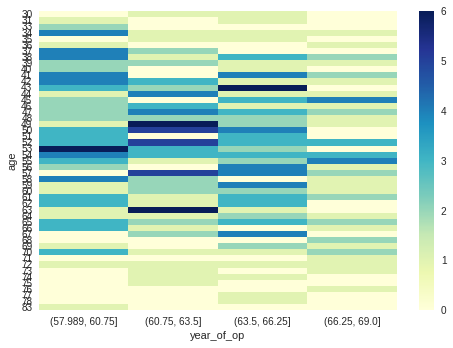

In [125]:
##  pd.qcut(df[headers[2]], 2, labels=['zero', 'at least 1'])

year_bins = pd.cut(df[headers[1]], 4) 

ages_cross_year = pd.crosstab(df[headers[0]], year_bins)

sns.heatmap(ages_cross_year,linewidths=0, cmap="YlGnBu");

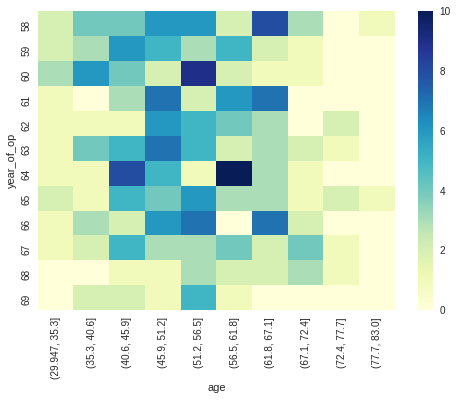

In [126]:
## the converse 

age_bins = pd.cut(df[headers[0]], 10)

years_cross_ages = pd.crosstab(df[headers[1]], age_bins)

sns.heatmap(years_cross_ages,linewidths=0, cmap="YlGnBu");

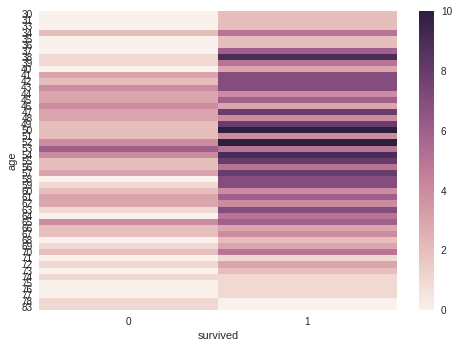

In [127]:
sns.heatmap(pd.crosstab(df[headers[0]], df[headers[3]]));


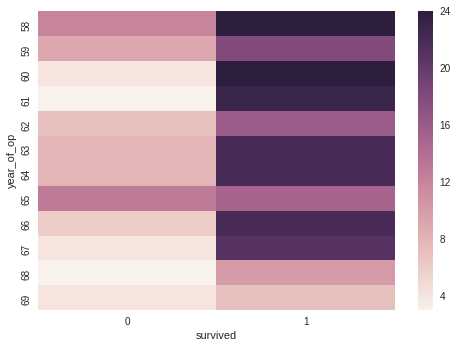

In [128]:
sns.heatmap(pd.crosstab(df[headers[1]], df[headers[3]]));


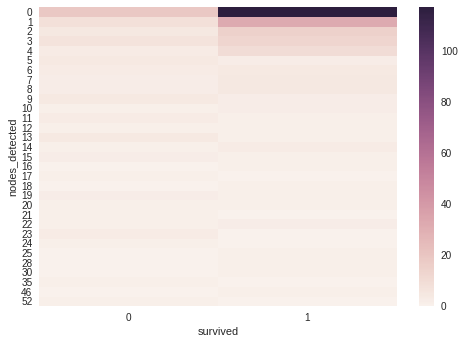

In [129]:
sns.heatmap(pd.crosstab(df[headers[2]], df[headers[3]]));

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
- What is at least one feature that looks to have a negative correlation with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

# I would prefer not to make statements about correlation from this data. 

If you look at the number of deaths by age, you'll see a concentration of deaths around the median, roughly age 53. However, there is also the greatest number of survivals at that age. 

In general, each time I thought I saw a correlation it turned out to be typical behavior when divided by totals. 

*However*, if you look at year of operation cross survival, *it doesn't look too good for the surgeons working year 1965*-- they failed almost as much as they succeeded! This is *unusual*: operations typically succeed more often than they fail. 

You can look at age cross survival, and see that 53 is the only age that dies more than it survives-- this is certainly anomalous,** but "correlation" is a strong word and I'd like to be more confident** before i said "getting the operation at age 53 correlates with dying" 

The last thing we'll point out is that* triggering zero censors is in general a good sign.* it may not be strong enough to call it "correlation", but it definitely stands out. 

In [0]:
# ok, lets play w year 1965

N=len(df)
df2 = pd.DataFrame(columns=[headers[0],headers[1],headers[3]])

# # print(N)
# for k in range(N):
#   dummy=df[headers[1]][k]
#   if dummy==65:
#     df2.add(df[headers[0]][k], df[headers[2]][k], df[headers[3]][k])
#   # else: continue

# TODO-- there should be a simple projection-- taking an N-dimensional thing 
# ## and setting one feature to a constant to return an N-1 dimensional thing. 
# should look like "df2 = df.copy(where df[headers[1]]==65)"

Since the most suggestive features were year of op and nodes detected, rather than age who's behavior is too normal to be interesting, 

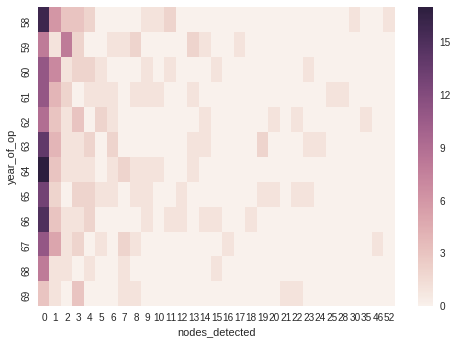

In [131]:
# for title, group in df.groupby(headers[3]):
#     group.plot(x=[headers[1]], y=[headers[2]], title=title); 
# # not sure what this means. 

sns.heatmap(pd.crosstab(df[headers[1]],df[headers[2]])); 

In [0]:
sns.pairplot(pd.crosstab(df[headers[2]],df[headers[1]])); ## 

### ### ### hue=headers[3] argument isn't working for some annoying reason. 

One very interesting thing we can see is that **as year of op grows higher, the density with which occurences are packed into the bottom-left shrinks**, weakly suggesting that the detection equipment changed over time, adjusting the rate of node-activation. 